# Групповой проект №1. Первичный анализ данных "Международные авиаперевозки в США"

<img src="https://image.shutterstock.com/z/stock-vector-set-of-vector-tags-with-usa-airport-codes-vector-illustration-for-travelers-famous-american-451061281.jpg" height="400" />

Данные взяты из [отчета по статистике международных авиапассажирских и грузовых перевозок США](https://www.transportation.gov/policy/aviation-policy/us-international-air-passenger-and-freight-statistics-report#TheReports).

Этот же датасет, но в гугл драйв: https://drive.google.com/drive/folders/1P3i89WzfkVmC2L53G9qQxjzWJ3NSanat?usp=sharing

В ноутбуке скачивание данных происходит по ссылке с гугл-драйв, просьба не изменять.


Доступен следующий набор данных:

- **International_Report_Passengers.csv**: данные об общем количестве пассажиров за каждый месяц и год между парой аэропортов, обслуживаемых конкретной авиакомпанией.
Данные о пассажирах и грузоперевозках в США являются конфиденциальными в первые 6 месяцев, после чего они могут быть опубликованы. Количество пассажиров записывается в трех столбцах: «По расписанию», «Чартер» и «Всего»: "Scheduled", "Charter", "Total".

Описание атрибутов доступно по ссылке: https://data.transportation.gov/Aviation/International_Report_Passengers/xgub-n9bw


## Требования к групповому проекту

В качестве результата ваша группа должна получить презентацию и защитить ее на занятии.  
Ссылка на шаблон к презентации: [ссылка](https://docs.google.com/presentation/d/1eydwcHaGKznePEbFuRT810cEGLgB3YYqpy-cDeRx_ik/edit?usp=sharing).  
Вы можете менять оформление презентации, но помните, что результат должен быть релевантен для демонстрации заказчику. Например, вставлять в презентацию строчки кода не стоит :)

Помимо презентации, каждому из участников проекта нужно будет сдать свой notebook c решением на проверку. Наши ассистенты проверять ваш код, визуализацию и выводы, после чего вернутся к вам с фидбеком. 

**Вопросы, на которые нужно ответить в презентации перечислены в ноутбуке.**

Любой хороший data-scientist должен уметь работать в команде, поэтому распределение ваших усилий в проекте остается за вами. Как пример, вы можете распределить вопросы/слайды между собой.

При возникновении каких-либо проблем при выполнении группового проекта обязательно сразу пишите Марку. 

## Требования к оформлению графиков (в ноутбуке и в презентации)

1. Каждый график необходимо подписывать
2. Оси Х и У всегда подписаны
3. Выбрана подходящая шкала и шаг 
4. Не забывайте про логарифмическую шкалу и всегда используйте при необходимости!


# Итак, приступим

Импортируем необходимые библиотеки

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

## Загрузим International_Report_Passengers.csv

In [ ]:
url='https://drive.google.com/file/d/1nvi3GFkmZDXSbLrTe_ZmyNAjZGQ74A4D/view?usp=sharing'

url2='https://drive.google.com/uc?id=' + url.split('/')[-2]
df1 = pd.read_csv(url2, delimiter=',')
df1.dataframeName = 'International_Report_Passengers.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 693122 rows and 16 columns


## Посмотрим на наш датасет

In [ ]:
df1

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
0,07/01/2004,2004,7,14747,SEA,93,16229,YVR,906,19687,QX,1,Passengers,19265,0,19265
1,11/01/2008,2008,11,11697,FLL,33,12010,GUA,127,20416,NK,1,Passengers,3099,0,3099
2,10/01/2002,2002,10,10257,ALB,22,16271,YYZ,936,20206,QK,0,Passengers,33,0,33
3,03/01/2007,2007,3,12889,LAS,85,13165,MAN,493,19541,BD,0,Passengers,3815,0,3815
4,03/01/2009,2009,3,12892,LAX,91,13252,MEX,148,19534,AM,0,Passengers,17993,0,17993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693117,03/01/2021,2021,3,99999,ZZZ,1,11519,EIS,282,21743,2LQ,1,Passengers,0,16,16
693118,03/01/2021,2021,3,99999,ZZZ,1,11731,FPO,204,21743,2LQ,1,Passengers,0,9,9
693119,03/01/2021,2021,3,99999,ZZZ,1,13605,NAS,204,21743,2LQ,1,Passengers,0,19,19
693120,03/01/2021,2021,3,99999,ZZZ,1,14682,SAQ,204,21743,2LQ,1,Passengers,0,77,77


## Отсортируем данные по дате

In [ ]:
df1.sort_values(by=['Year','Month'], inplace=True)
#Аргумент «inplace = True» означает, что фрейм данных должен сделать изменения постоянными,
#То есть сохранит изменения в загруженной таблице (у нас это df1)

In [ ]:
df1

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
294485,01/01/1990,1990,1,11042,CLE,44,11032,CUN,148,19892,ACQ,0,Passengers,0,796,796
294617,01/01/1990,1990,1,12892,LAX,91,14228,PPT,823,19508,UT,0,Passengers,1790,0,1790
294655,01/01/1990,1990,1,13495,MSY,72,11032,CUN,148,19556,LR,0,Passengers,1515,0,1515
294671,01/01/1990,1990,1,12173,HNL,2,16232,YWG,926,19523,CP,0,Passengers,2370,0,2370
294762,01/01/1990,1990,1,13303,MIA,33,10846,BZE,106,20144,TX,0,Passengers,6489,0,6489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693117,03/01/2021,2021,3,99999,ZZZ,1,11519,EIS,282,21743,2LQ,1,Passengers,0,16,16
693118,03/01/2021,2021,3,99999,ZZZ,1,11731,FPO,204,21743,2LQ,1,Passengers,0,9,9
693119,03/01/2021,2021,3,99999,ZZZ,1,13605,NAS,204,21743,2LQ,1,Passengers,0,19,19
693120,03/01/2021,2021,3,99999,ZZZ,1,14682,SAQ,204,21743,2LQ,1,Passengers,0,77,77


# Посмотрим на кол-во записей в таблице для 2010-2020 годов

In [ ]:
# 1ый способ:
n_flight_days_per_carrier = df1.loc[df1['Year']==2010]
print(len(n_flight_days_per_carrier))

23551


In [ ]:
# 2ой способ
n_flight_days_per_carrier = df1.query('Year==2010')
print(len(n_flight_days_per_carrier))

23551


 Согласитесь второй способ (с использованием "query") удобнее и красивее?

In [ ]:
# можно писать несколько условий
df1.query("Year==2020 & Month==3 & carrier=='RV'").head(3)

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
671596,03/01/2020,2020,3,11697,FLL,33,16149,YOW,936,21610,RV,0,Passengers,4280,0,4280
671601,03/01/2020,2020,3,11697,FLL,33,16217,YUL,941,21610,RV,0,Passengers,40105,0,40105
671611,03/01/2020,2020,3,11697,FLL,33,16271,YYZ,936,21610,RV,0,Passengers,29844,0,29844


In [ ]:
years_to_check = np.arange(2010, 2022)

for year in years_to_check:
    n_flights = df1.query('Year=='+str(year))
    print(f"Для {year} года в таблице {len(n_flights)} записей.") #Как видите, в методе print() для вывода использован f-string.
                                                                    #Почитать подробнее можно здесь: https://realpython.com/python-f-strings/

Для 2010 года в таблице 23551 записей.
Для 2011 года в таблице 24516 записей.
Для 2012 года в таблице 24070 записей.
Для 2013 года в таблице 24464 записей.
Для 2014 года в таблице 25843 записей.
Для 2015 года в таблице 27234 записей.
Для 2016 года в таблице 28645 записей.
Для 2017 года в таблице 29998 записей.
Для 2018 года в таблице 30667 записей.
Для 2019 года в таблице 30436 записей.
Для 2020 года в таблице 15868 записей.
Для 2021 года в таблице 4183 записей.


В методе print() для вывода использован f-string. Почитать подробнее можно здесь: https://realpython.com/python-f-strings/

In [ ]:
# Проверим пропуски
df1.isna().sum()

data_dte           0
Year               0
Month              0
usg_apt_id         0
usg_apt            0
usg_wac            0
fg_apt_id          0
fg_apt             0
fg_wac             0
airlineid          0
carrier         2797
carriergroup       0
type               0
Scheduled          0
Charter            0
Total              0
dtype: int64

Фильтрация: только 2012 год, перелеты между LAX и LHR

In [ ]:
flights_df = df1.loc[(df1['Year']==2012) & (df1['usg_apt']=='LAX')
                     & (df1['fg_apt']=='LHR')]
print(len(flights_df))

flights_df = df1.query("Year==2012 & usg_apt=='LAX' & fg_apt=='LHR'")
print(len(flights_df))

62
62


In [ ]:
flights_df.head(20)

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
227407,01/01/2012,2012,1,12892,LAX,91,12972,LHR,493,19805,AA,1,Passengers,9915,0,9915
235857,01/01/2012,2012,1,12892,LAX,91,12972,LHR,493,19933,NZ,0,Passengers,15432,0,15432
239702,01/01/2012,2012,1,12892,LAX,91,12972,LHR,493,19682,VS,0,Passengers,24996,0,24996
244190,01/01/2012,2012,1,12892,LAX,91,12972,LHR,493,19540,BA,0,Passengers,32501,0,32501
260751,01/01/2012,2012,1,12892,LAX,91,12972,LHR,493,19977,UA,1,Passengers,9839,0,9839
233336,02/01/2012,2012,2,12892,LAX,91,12972,LHR,493,19933,NZ,0,Passengers,14779,0,14779
238042,02/01/2012,2012,2,12892,LAX,91,12972,LHR,493,19540,BA,0,Passengers,28662,0,28662
251653,02/01/2012,2012,2,12892,LAX,91,12972,LHR,493,19805,AA,1,Passengers,9354,0,9354
270916,02/01/2012,2012,2,12892,LAX,91,12972,LHR,493,19682,VS,0,Passengers,18240,0,18240
277576,02/01/2012,2012,2,12892,LAX,91,12972,LHR,493,19977,UA,1,Passengers,8077,0,8077


Полный пассажиропоток

In [ ]:
flights_df['Total'].sum()

1389782

Вот так можно получить двумерную таблицу для последующей визуализации:

В примере: таблица суммарного трафика авиакомпаний в каждый из месяцев (за 2012 год, между LAX и LHR)

In [ ]:
pd.pivot_table(flights_df, values='Total', index='Month',
                        columns='carrier', aggfunc='sum')

carrier,0WQ,AA,BA,NZ,UA,VS
Month,,,,,,
1,NaN,9915.0,32501.0,15432.0,9839.0,24996.0
2,NaN,9354.0,28662.0,14779.0,8077.0,18240.0
3,NaN,12765.0,38616.0,15793.0,11583.0,26090.0
4,NaN,12957.0,52383.0,15304.0,10133.0,29249.0
5,NaN,13647.0,54154.0,15527.0,12908.0,29847.0
6,8.0,13760.0,53764.0,17176.0,13486.0,36043.0
7,NaN,14126.0,56069.0,18203.0,15196.0,37898.0
8,14.0,14382.0,55231.0,18088.0,15105.0,38273.0
9,NaN,13765.0,54128.0,17815.0,13588.0,37097.0


# Задание 1. Пассажирский трафик
Вопрос 1: Постройте график изменения кол-ва перевезенных людей (столбец Total) за январь-декабрь 2019 года и за январь-декабрь 2020. Можно построить в два графика или отразить 2 кривые на одном (второй вариант предпочтительнее, но тогда не забудьте изменить цвет у кривых). Какой вывод можно сделать исходя из графиков?

Ответ:


In [ ]:
data=pd.DataFrame(df1.groupby(['Year','Month'],as_index=False).Total.sum())

In [ ]:
data=data[(data.Year==2019) | (data.Year==2020)]

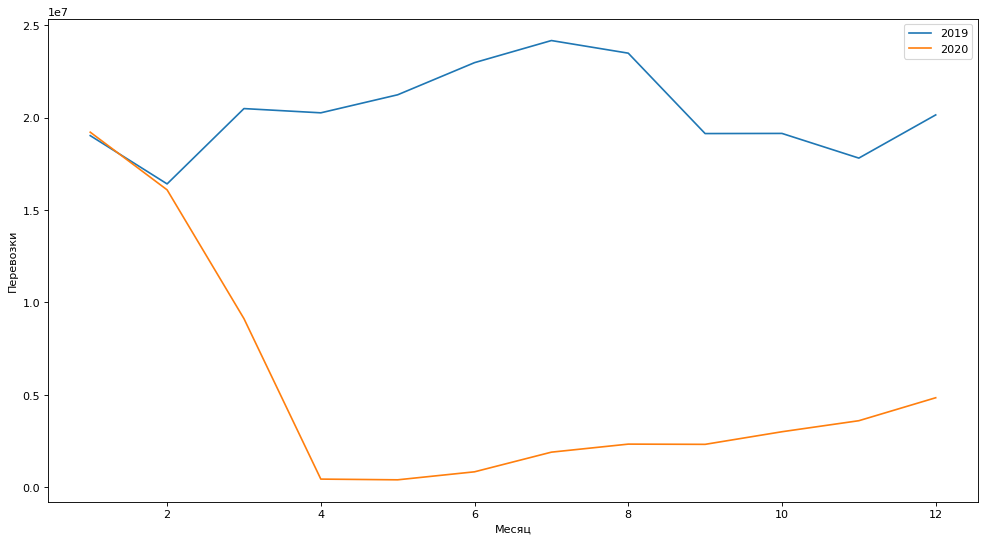

In [ ]:
t=np.arange(1,13,1)
plt.figure(figsize=(15, 8), dpi=80)
plt.plot(t,data[data.Year==2019].Total,t,data[data.Year==2020].Total)
plt.xlabel("Месяц")
plt.ylabel("Перевозки")
plt.legend(['2019','2020'])

Вопрос 2: как изменился (в процентах) трафик между США и другими странами в период с января по декабрь 2020 года по сравнению с январем-декабрем 2019 года? (трафик=кол-во перевезенных за месяц людей). Изобразите в виде графика: по оси Х - месяц+год, по оси У - изменение трафика в процентах.

Ответ:

In [ ]:
t=np.array(data[data.Year==2019].Total)

In [ ]:
data2=data.copy()
data2['Total']=(data2.Total/t[data2.Month-1]-1)

Text(0, 0.5, 'Изменения перевозок отностительно прошлого года в процентах')

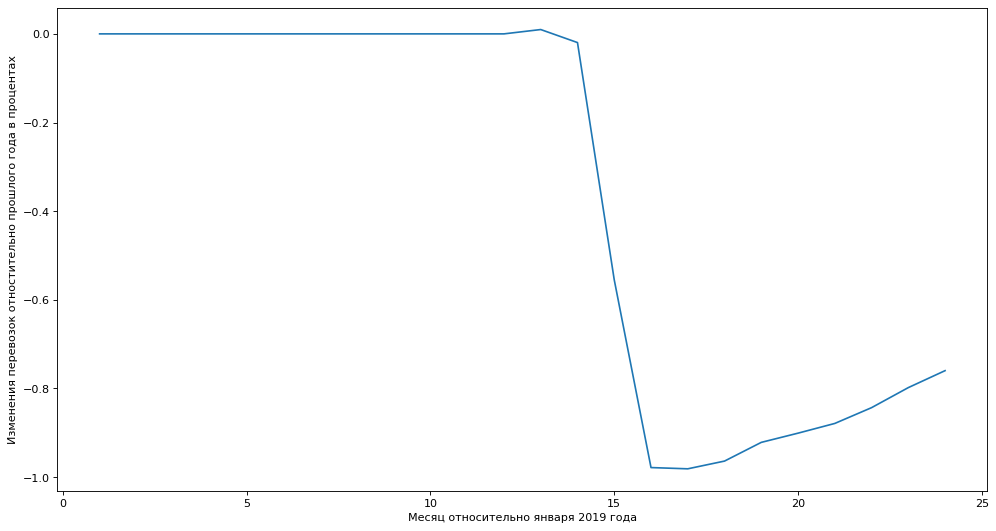

In [ ]:
data2.Total/=100
t1=np.arange(1,25,1)
plt.figure(figsize=(15, 8), dpi=80)
plt.plot(t1,data2.Total)
plt.xlabel("Месяц относительно января 2019 года")
plt.ylabel("Изменения перевозок отностительно прошлого года в процентах")

# Задание 2. Загруженность авиакомпаний

Вопрос 1: Нарисуйте топ 5 популярных авиакомпаний (airlineid, carrier) за все года (1990-2021). По оси Х на графике укажите название авикомпании (БЕЗ кода), по оси У - кол-во перевезенных людей за все года.

Ответ:

In [ ]:
data_com=pd.DataFrame(df1[df1.type=='Passengers'].groupby('carrier',as_index=False).Total.sum())

In [ ]:
data_com.head(6)

,carrier,Total
113,AA,595045474
519,UA,421801116
190,DL,387619198
142,BA,173910674
174,CO,173862884
117,AC,142714084


In [ ]:
data_com=data_com.sort_values(by='Total',ascending=False)

In [ ]:
data_com1=data_com[:5]

In [ ]:
data_com1

,carrier,Total
113,AA,595045474
519,UA,421801116
190,DL,387619198
142,BA,173910674
174,CO,173862884


In [ ]:
data_com1.index=np.array(['American Al','United Al','Delta','British Aw','Cargo Al'])

In [ ]:
data_com1.reset_index(inplace=True)

Text(0, 0.5, 'Кол-во пассажиров')

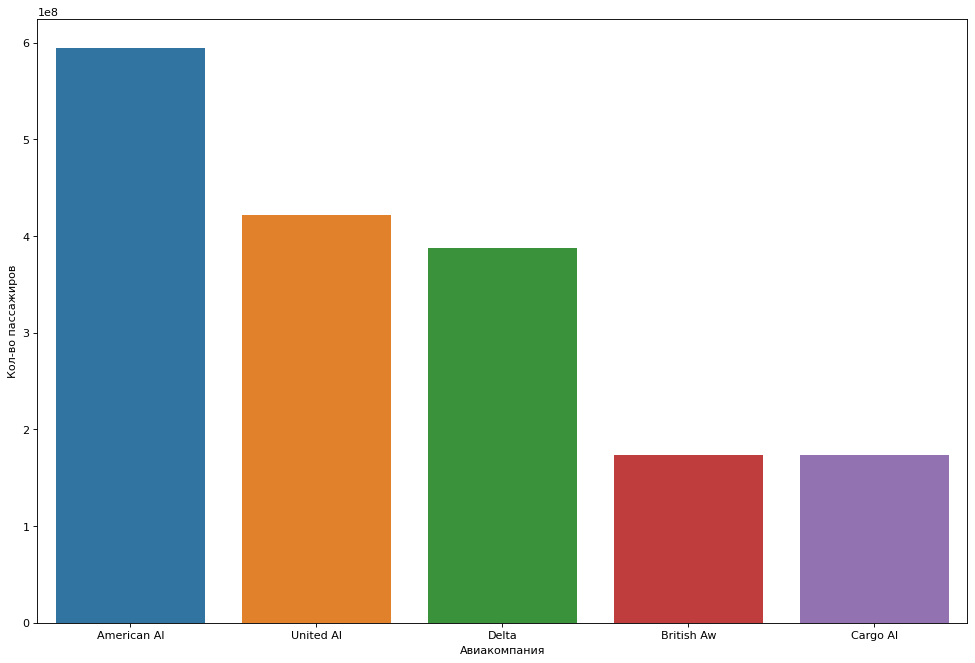

In [ ]:
plt.figure(figsize=(15, 10), dpi=80)
sns.barplot(x='index',y='Total',data=data_com1)
plt.xlabel("Авиакомпания")
plt.ylabel("Кол-во пассажиров")

Вопрос 2: Какая авиакомпания самая "быстрорастущая", если оценивать рост по кол-ву перевезенных людей? Какая компания теряет клиентов?

Ответ:

In [ ]:
data_car=pd.DataFrame(df1[df1.type=='Passengers'].groupby(['carrier','Year'],as_index=False).Total.mean())

In [ ]:
last=data_car[data_car.Year==2021].sort_values('carrier')

In [ ]:
last.set_index('carrier',inplace=True)

In [ ]:
first=data_car[(data_car.carrier.isin(last.index)) & (data_car.Year==2018)]

In [ ]:
first=first.sort_values(by='carrier')

In [ ]:
last.reset_index(inplace=True)

In [ ]:
first

,carrier,Year,Total
26,04Q,2018,99.952153
61,09Q,2018,1139.416667
76,0BQ,2018,4.666667
91,0CQ,2018,3.468750
171,0UQ,2018,5.400000
...,...,...,...
5910,X9,2018,894.750000
6014,Y4,2018,4246.037846
6038,YV,2018,4697.105611
6065,YX,2018,3279.115987


In [ ]:
last=last[last.carrier.isin(first.carrier)]

In [ ]:
last

,carrier,Year,Total
0,04Q,2021,94.960784
1,09Q,2021,394.326241
2,0BQ,2021,2.250000
3,0CQ,2021,1.000000
4,0UQ,2021,1.000000
...,...,...,...
139,X9,2021,651.500000
140,Y4,2021,3234.436364
141,YV,2021,1470.500000
142,YX,2021,1716.063830


In [ ]:
first

,carrier,Year,Total
26,04Q,2018,99.952153
61,09Q,2018,1139.416667
76,0BQ,2018,4.666667
91,0CQ,2018,3.468750
171,0UQ,2018,5.400000
...,...,...,...
5910,X9,2018,894.750000
6014,Y4,2018,4246.037846
6038,YV,2018,4697.105611
6065,YX,2018,3279.115987


In [ ]:
b=np.array(first.Total)

In [ ]:
last.Total=last.Total-b

In [ ]:
last=last.sort_values(by='Total',ascending=False)

In [ ]:
last

,carrier,Year,Total
27,5D,2021,2594.033333
24,3BQ,2021,19.916667
67,GCQ,2021,3.214286
54,CRV,2021,2.642857
22,2UQ,2021,0.900000
...,...,...,...
59,EK,2021,-15634.465769
106,OZ,2021,-17232.151606
47,BA,2021,-17519.249406
55,CX,2021,-19672.233645


In [ ]:
data_car_d=data_car[data_car.carrier=='5D']

In [ ]:
data_car_d

,carrier,Year,Total
561,5D,2002,693.166667
562,5D,2003,691.196721
563,5D,2004,729.842105
564,5D,2005,960.750000
565,5D,2006,924.261905
566,5D,2007,351.484848
567,5D,2008,324.010204
568,5D,2009,1208.338710
569,5D,2010,2152.137097
570,5D,2011,2743.611111


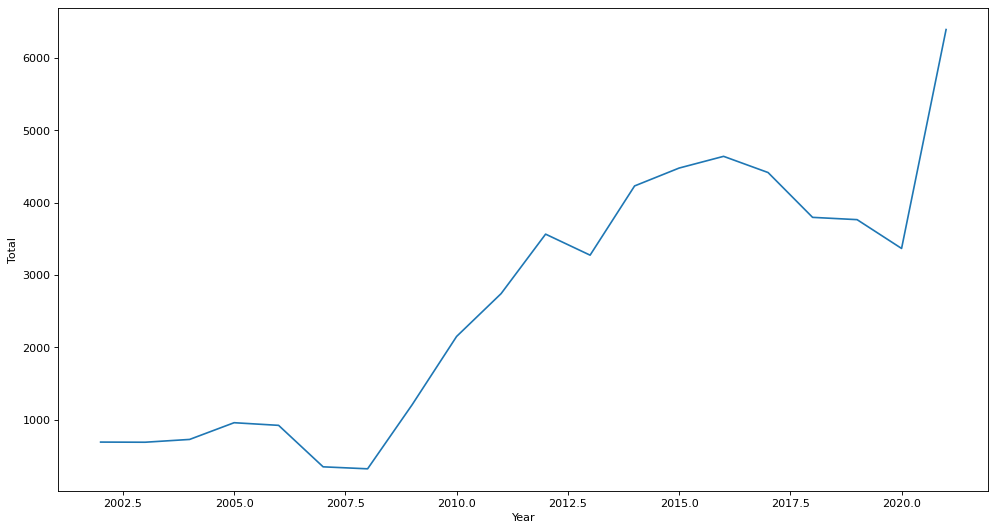

In [ ]:
plt.figure(figsize=(15, 8), dpi=80)
sns.lineplot(x=data_car_d.Year,y=data_car_d.Total)

# Самый растущая авикомпания Aeroméxico Connect, в самом упадке - EVA Airways Corporation

In [ ]:
data_car_b=data_car[data_car.carrier=='BR']


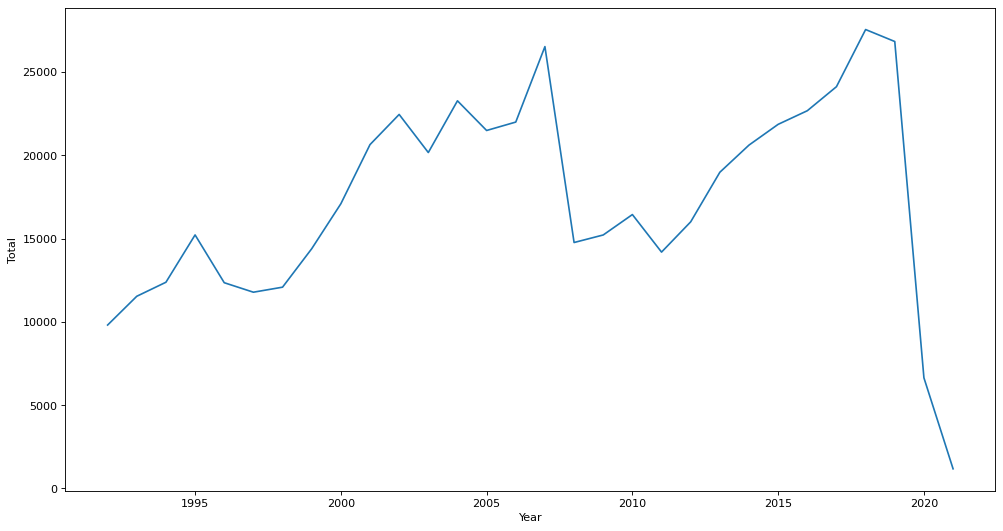

In [ ]:
plt.figure(figsize=(15, 8), dpi=80)
sns.lineplot(x=data_car_b.Year,y=data_car_b.Total)

# Задание 3. Загруженность аэропортов

Вопрос 1: Нарисуйте топ 5 по загруженности аэропортов В США за все года (1990-2021). По оси Х на графике укажите код аэропорта + город, в котором он находится (город по коду придется найти в открытых источниках), по оси У - кол-во перевезенных людей за все года. Для кодировки аэропортов используется код IATA (International Air Transport Association airport code).

Ответ:


In [ ]:
data_air=pd.DataFrame(df1.groupby('usg_apt',as_index=False).Total.sum())

In [ ]:
data_air=data_air.sort_values(by='Total',ascending=False)

In [ ]:
data_air=data_air[:5]

In [ ]:
data_air


,usg_apt,Total
373,JFK,637704748
401,LAX,494598691
475,MIA,492595411
580,ORD,291060609
224,EWR,260198984


In [ ]:
data_air.usg_apt=['JFK New-York','LAX LA','MIA Miami','ORD Chiraq','EWR New-York']

Text(0, 0.5, 'Кол-во пассажиров')

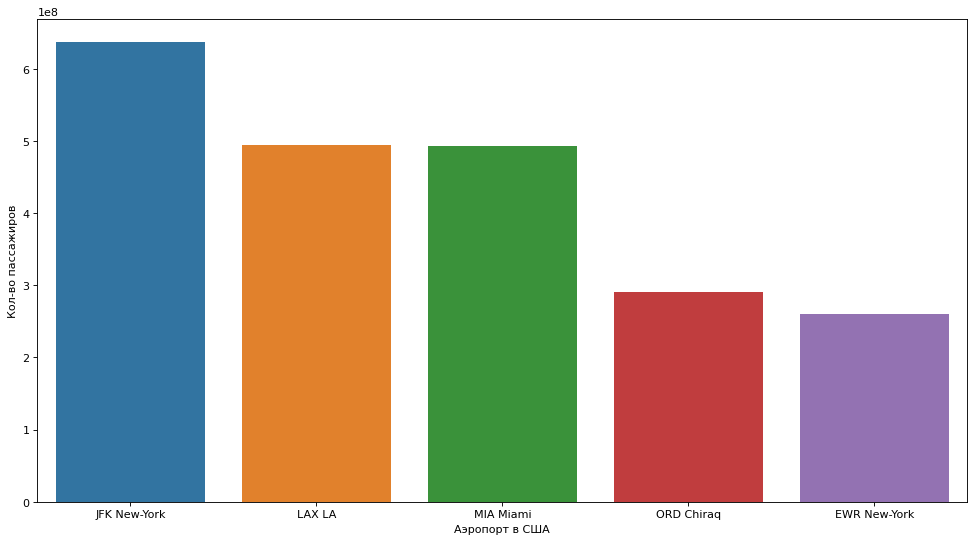

In [ ]:
plt.figure(figsize=(15, 8), dpi=80)
sns.barplot(x='usg_apt',y='Total',data=data_air)
plt.xlabel("Аэропорт в США")
plt.ylabel("Кол-во пассажиров")

Вопрос 2: Нарисуйте топ 5 популярных иностранных аэропортов (ВНЕ США) за все года (1990-2021). По оси Х на графике укажите код аэропорта + город, в котором он находится (город по коду придется найти в открытых источниках), по оси У - кол-во перевезенных людей за все года.

Ответ:

In [ ]:
data_air2=pd.DataFrame(df1.groupby('fg_apt',as_index=False).Total.sum())
data_air2=data_air2.sort_values(by='Total',ascending=False)
data_air2=data_air2[:5]

In [ ]:
data_air2

,fg_apt,Total
589,LHR,329502887
1303,YYZ,258685802
749,NRT,255191416
369,FRA,175502951
187,CDG,155115746


In [ ]:
data_air2.fg_apt=['LHR London','YYZ Toronto','NRT Tokyo','FRA Frankfurt','CDG Paris']

Text(0, 0.5, 'Кол-во пассажиров')

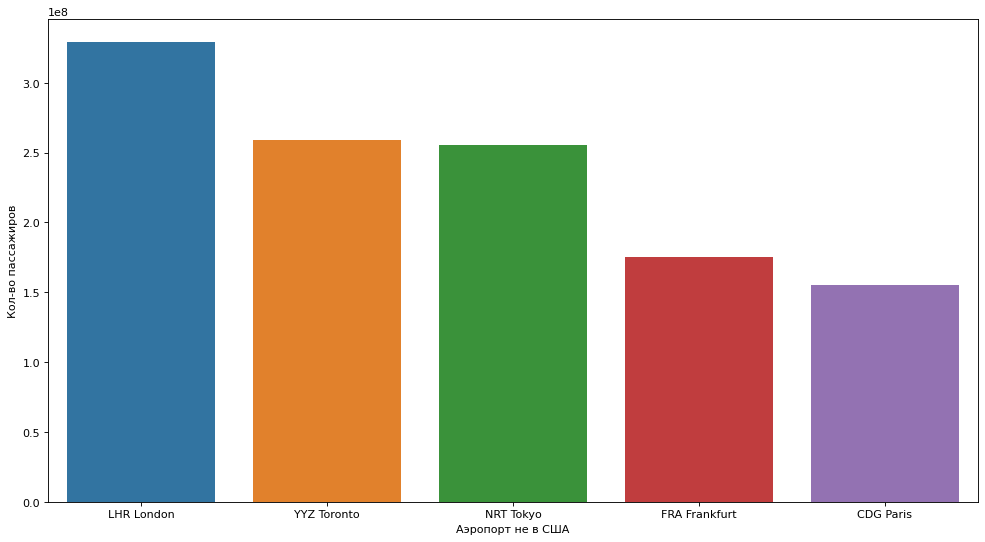

In [ ]:
plt.figure(figsize=(15, 8), dpi=80)
sns.barplot(x='fg_apt',y='Total',data=data_air2)
plt.xlabel("Аэропорт не в США")
plt.ylabel("Кол-во пассажиров")

# Задание 4. Подробный анализ загруженности

Вопрос 1: Для каждого года выведите топ месяцев, в которых трафик был максимальным (постарайтесь визуализировать так, чтобы с первого взгляда график был понятен и читался "вне контекста")

Ответ:

In [ ]:
#выделим топ-3 месяца
data_time=pd.DataFrame(df1.groupby(['Year','Month'],as_index=False).Total.sum())

In [ ]:
for y in range (11,373,12): data_time.loc[y-11:y] = data_time.loc[y-11:y].sort_values(by='Total').values

In [ ]:
years=[]
months=[]

In [ ]:
data_time

,Year,Month,Total
0,1990,2,5608228
1,1990,11,6231111
2,1990,1,6271648
3,1990,12,6538180
4,1990,10,6632612
...,...,...,...
370,2020,2,16094637
371,2020,1,19216351
372,2021,1,4567804
373,2021,2,3021545


In [ ]:
for i in range (372):
  if (12-i%12<4): years.append(data_time.iloc[i].Year);months.append(data_time.iloc[i].Month)

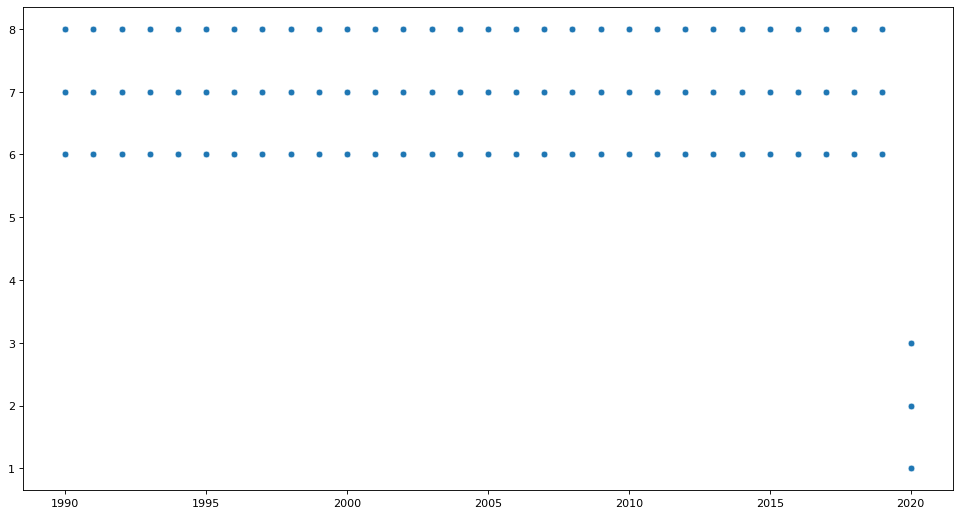

In [ ]:
plt.figure(figsize=(15, 8), dpi=80)
sns.scatterplot(x=years,y=months)

Вопрос 2: Есть ли какие-то повторяющиеся месяцы, входящие в топ из года в год (или несколько лет подряд)? Если да, то какие для этого могут быть причины? Выдвиньте несколько гипотез.

Ответ:



# Новый раздел Самые активные месяцы - это происходит из-за того, что люди ездят в отпуски, в начале лета - уезжают, в конце - приезжают, можно заметить, что в 2020 самыми активными месяцами стали январь, февраль и март, это связано с пандемией covid-19

Вопрос 3: Какое кол-во людей (в процентах) потеряли ТОП 5 **авиакомпаний** за период февраль-декабрь 2020 года, в сравнении с периодом февраль-декабрь 2019 года? Отобразите на графике. 

Ответ:

In [ ]:
data_comp=pd.DataFrame(df1.groupby(['carrier','Year','Month'],as_index=False).Total.sum())

In [ ]:
a=data_com1.carrier

In [ ]:
a=a.append(pd.Series(['AC']))

In [ ]:
a

0    AA
1    UA
2    DL
3    BA
4    CO
0    AC
dtype: object

In [ ]:
sum1=data_comp[(data_comp.carrier.isin(a))&(data_comp.Year==2019) & (data_comp.Month>1)].Total.sum()

In [ ]:
sum1

89759310

In [ ]:
sum2=data_comp[(data_comp.carrier.isin(a))&(data_comp.Year==2020) & (data_comp.Month>1)].Total.sum()

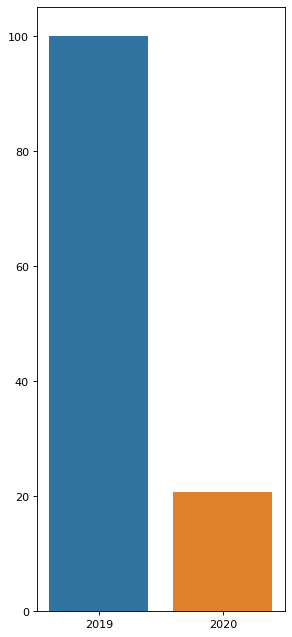

In [ ]:
plt.figure(figsize=(4, 10), dpi=80)
d=np.array([sum1,sum2])
d=d/sum1*100
sns.barplot(x=np.array([2019,2020]),y=d)


#Прибыль снизилась на 80%


Вопрос 4: Предположим, что по предварительным рассчетам (на июнь 2019 года) план по перелетам на февраль-декабрь 2020 года был такой же как на февраль-декабрь 2019 года. Если так, то какие фактические убытки понесли ТОП 5 **авиакомпаний**, если чистая прибыль за 1 человека в среднем = 15$.

Ответ:

# убытки составили - 89759310 * 0.8 * 15$ ~ 1 миллиард и 77 миллионов долларов

# Задание 5 (Дополнительно)
Здесь Вы можете поэксперементировать - провести собственный анализ, выдвинуть гипотезы относительно данных